# Explorary data analysis

Посмотрим что содержится в нашем наборе данных, что можно из этого извлечь

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = "https://raw.githubusercontent.com/rzabolotin/ml_team_heart_disease_UCI/master/data/heart.csv"

In [3]:
df = pd.read_csv(DATA_PATH)

## Вспомогательные функции

In [17]:
def display_boxplots(column_name, order=None):
    """
    Выводит бокплоты по колонке
    """
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.boxplot(x=column_name, y='target',
                data=df,
                order=order,
                ax=ax)
    ax.set_title('Boxplot для ' + column_name)
    plt.show()

# Описание набора данных

In [4]:
print('Набор данных содержит {} строк и {} колонок'.format(*df.shape))

Набор данных содержит 303 строк и 14 колонок


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


В наборе 303 строки и 14 признаков. Пропущенных значений нету.

# Анализ колонок

## Target
Информация о наличии/отсутствии заболевания сердца

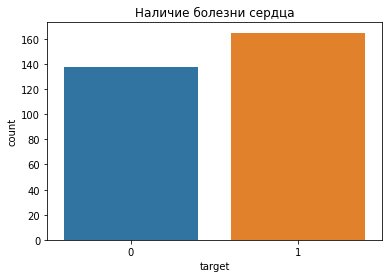

In [8]:
sns.countplot(x=df.target)
plt.title("Наличие болезни сердца")
plt.show()

Можно сказать что выборка сбалансированна. Положительный и отрицательный класс представлены почти поровну.

## Количественные колонки

### Age - возраст

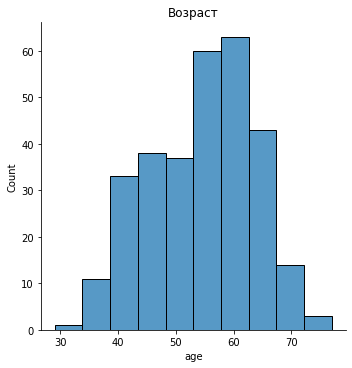

Медианный возврат 55.0


In [9]:
sns.displot(x=df.age, bins=10)
plt.title("Возраст")
plt.show() 
print(f"Медианный возврат {df.age.median()}")

Возраст распределен почти нормально, с небольним смещением вправо. Медианный возвраст 55 лет. Значит в выборке представлены в основном старики.

### trestbps

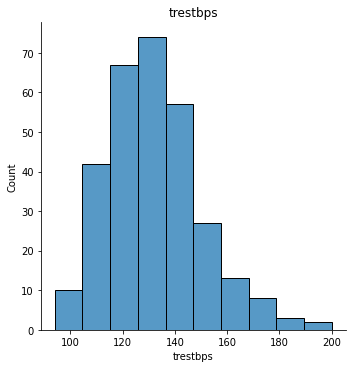

In [10]:
sns.displot(x=df.trestbps, bins=10)
plt.title("trestbps")
plt.show() 

### chol

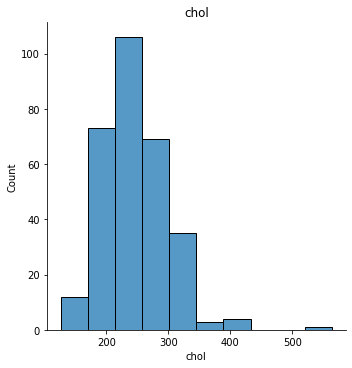

In [11]:
sns.displot(x=df.chol, bins=10)
plt.title("chol")
plt.show() 

### thalach

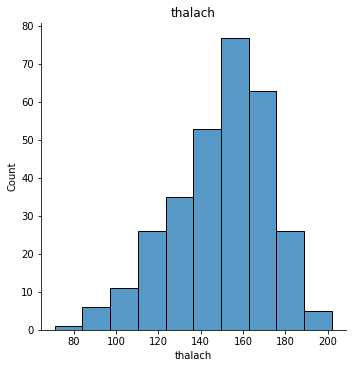

In [12]:
sns.displot(x=df.thalach, bins=10)
plt.title("thalach")
plt.show() 

В числовых признаках trestbps, chol и thalach видно ненормальное (скорее лог-нормальное) распределение. Наверное стоит сделать логарифмирование для использования этих фич в дальнейшем.

## Категориальные признаки


### Sex - пол

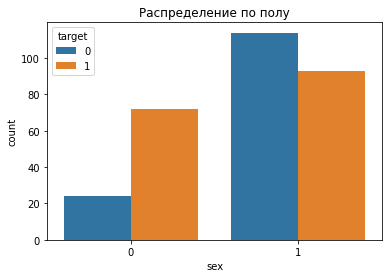

In [25]:
sns.countplot(x=df.sex, hue=df.target)
plt.title("Распределение по полу")
plt.show()

## cp

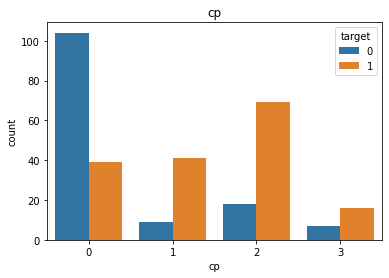

In [24]:
sns.countplot(x=df.cp, hue=df.target)
plt.title("cp")
plt.show()